In [285]:
!pip -q install quantiphy numpy sympy pandas matplotlib

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, MultipleLocator, ScalarFormatter
import pandas as pd
from quantiphy import Quantity
from typing import List

In [287]:
def print_param(name: str, value: float, unit: str = "") -> None:
	print(name + ": " + str(Quantity(value, unit)))

def log_2_linear(gain: float) -> float:
	return 10.0 ** (gain / 20.0)

def linear_2_log(gain: float) -> float:
	return 20.0 * np.log10(gain)

def get_EE_list(limit: int = 21) -> List[ float ]:
	return [x * (10 ** i) for i in range(1, limit) for x in [ 1.5e-12, 1.8e-12, 2.2e-12, 2.7e-12, 3.3e-12, 4.7e-12, 5.1e-12, 6.8e-12, 7.5e-12, 8.2e-12, 9.1e-12, 10e-12 ]]

def round_to_commercial(value: float) -> float:
	EE: List[ float ] = get_EE_list()
	index: int = 0
	close: float = np.inf
	for i, val in enumerate(EE):
		diff = val - value
		if np.abs(diff) < close:
			close = np.abs(diff)
			index = i
	return EE[index]


### 1 - Projetar e simular um filtro passa-alta de primeira ordem

In [288]:
# 1 - Projetar e simular um filtro passa-alta de primeira ordem [gain = 3, cut = 230Hz]

# Cut frequency in Hz
fc: float = 230

# Angular velocity
wc: float = 2 * np.pi * fc

# Linear gain
K: float = 3

# First order
b: float = 1

# Base multiply / divide factor
factor: int = 1000000

# Searches for the best component fit till 10uF cap
last_diff: int = 9999999
res: List[ float ] = []
for C in get_EE_list(5):
	R1 = b / (wc * C)
	R3 = K * R1
	R2 = R3 / (K -1)
	R1_commercial = round_to_commercial(R1)
	R2_commercial = round_to_commercial(R2)
	R3_commercial = round_to_commercial(R3)
	total_diff = np.abs(R1_commercial - R1) + np.abs(R2_commercial - R2) + np.abs(R3_commercial - R3)
	if (total_diff < last_diff):
		last_diff = total_diff
		res = [ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ]

# Fetches saved value
[ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ] = res

print("Parameters: ")
print_param("C", C, "F")
print_param("Ideal R1", R1, "Ω")
print_param("Ideal R2", R2, "Ω")
print_param("Ideal R3", R3, "Ω")
print_param("Round R1", R1_commercial, "Ω")
print_param("Round R2", R2_commercial, "Ω")
print_param("Round R3", R3_commercial, "Ω")
print("Simulation parameters: ")
print(" - Ideal:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1)} R2={Quantity(R2)} R3={Quantity(R3)}")
print(" - Rounded to commercial:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1_commercial)} R2={Quantity(R2_commercial)} R3={Quantity(R3_commercial)}")

Parameters: 
C: 100 nF
Ideal R1: 6.9198 kΩ
Ideal R2: 10.38 kΩ
Ideal R3: 20.759 kΩ
Round R1: 6.8 kΩ
Round R2: 10 kΩ
Round R3: 22 kΩ
Simulation parameters: 
 - Ideal:
	.param C=100n R1=6.9198k R2=10.38k R3=20.759k
 - Rounded to commercial:
	.param C=100n R1=6.8k R2=10k R3=22k


### 2 - Projetar e simular um filtro passa-alta de primeira ordem

In [289]:
# 1 - Projetar e simular um filtro passa-alta de primeira ordem [gain = 29, cut = 230Hz]

# Cut frequency in Hz
fc: float = 230

# Angular velocity
wc: float = 2 * np.pi * fc

# Linear gain
K: float = 29

# First order
b: float = 1

# Base multiply / divide factor
factor: int = 1000000

# Searches for the best component fit cap
last_diff: int = 9999999
res: List[ float ] = []
for C in get_EE_list(5):
	R1 = b / (wc * C)
	R3 = K * R1
	R2 = R3 / (K -1)
	R1_commercial = round_to_commercial(R1)
	R2_commercial = round_to_commercial(R2)
	R3_commercial = round_to_commercial(R3)
	total_diff = np.abs(R1_commercial - R1) + np.abs(R2_commercial - R2) + np.abs(R3_commercial - R3)
	if (total_diff < last_diff):
		last_diff = total_diff
		res = [ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ]

# Fetches saved value
[ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ] = res

print_param("C", C, "F")
print_param("Ideal R1", R1, "Ω")
print_param("Ideal R2", R2, "Ω")
print_param("Ideal R3", R3, "Ω")
print_param("Round R1", R1_commercial, "Ω")
print_param("Round R2", R2_commercial, "Ω")
print_param("Round R3", R3_commercial, "Ω")
print("Simulation parameters: ")
print(" - Ideal:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1)} R2={Quantity(R2)} R3={Quantity(R3)}")
print(" - Rounded to commercial:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1_commercial)} R2={Quantity(R2_commercial)} R3={Quantity(R3_commercial)}")

C: 91 nF
Ideal R1: 7.6042 kΩ
Ideal R2: 7.8757 kΩ
Ideal R3: 220.52 kΩ
Round R1: 7.5 kΩ
Round R2: 8.2 kΩ
Round R3: 220 kΩ
Simulation parameters: 
 - Ideal:
	.param C=91n R1=7.6042k R2=7.8757k R3=220.52k
 - Rounded to commercial:
	.param C=91n R1=7.5k R2=8.2k R3=220k


### 3 - Projetar e simular um filtro passa-baixa de primeira ordem

In [290]:
# 1 - Projetar e simular um filtro passa-baixa de primeira ordem [gain = 29, cut = 10kHz]

# Cut frequency in Hz
fc: float = 10e3

# Angular velocity
wc: float = 2 * np.pi * fc

# Linear gain
K: float = 29

# First order
b: float = 1

# Base multiply / divide factor
factor: int = 1000000

# Searches for the best component fit cap
last_diff: int = 9999999
res: List[ float ] = []
for C in get_EE_list(4):
	R1 = 1 / (b * wc * C)
	R3 = K * R1
	R2 = R3 / (K -1)
	R1_commercial = round_to_commercial(R1)
	R2_commercial = round_to_commercial(R2)
	R3_commercial = round_to_commercial(R3)
	total_diff = np.abs(R1_commercial - R1) + np.abs(R2_commercial - R2) + np.abs(R3_commercial - R3)
	if (total_diff < last_diff):
		last_diff = total_diff
		res = [ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ]

# Fetches saved value
[ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ] = res

print_param("C", C, "F")
print_param("Ideal R1", R1, "Ω")
print_param("Ideal R2", R2, "Ω")
print_param("Ideal R3", R3, "Ω")
print_param("Round R1", R1_commercial, "Ω")
print_param("Round R2", R2_commercial, "Ω")
print_param("Round R3", R3_commercial, "Ω")
print("Simulation parameters: ")
print(" - Ideal:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1)} R2={Quantity(R2)} R3={Quantity(R3)}")
print(" - Rounded to commercial:")
print(f"\t.param C={Quantity(C)} R1={Quantity(R1_commercial)} R2={Quantity(R2_commercial)} R3={Quantity(R3_commercial)}")

C: 9.1 nF
Ideal R1: 1.749 kΩ
Ideal R2: 1.8114 kΩ
Ideal R3: 50.72 kΩ
Round R1: 1.8 kΩ
Round R2: 1.8 kΩ
Round R3: 51 kΩ
Simulation parameters: 
 - Ideal:
	.param C=9.1n R1=1.749k R2=1.8114k R3=50.72k
 - Rounded to commercial:
	.param C=9.1n R1=1.8k R2=1.8k R3=51k


### 4 - Projetar e simular um filtro passa-baixa de terceira ordem (Chebyshev)

In [291]:
# 1 - Projetar e simular um filtro passa-baixa de terceira ordem [gain = 29, cut = 10kHz]

# Cut frequency in Hz
fc: float = 10e3

# Angular velocity
wc: float = 2 * np.pi * fc

# Total gain
total_k: float = 29

# Per stage gain
K: float = np.sqrt(total_k)

# Base multiply / divide factor
factor: int = 1000000

# First stage for 0.1dB
a0: float = 0.969406
b0: float = 1.689747

# Second stage for 0.5dB
a1: float = 0.969406

# First stage low pass calcs order 2

# Searches for the best component fit cap
last_diff: int = 9999999
res: List[ float ] = []
for C in get_EE_list(6):
	C2: float = round_to_commercial((10 / fc) / factor)
	C1: float = (((a0 ** 2) + (4 * b0 * (K - 1))) * C2) / (4 * b0)
	C1_commercial: float = round_to_commercial(C2)

	R1: float = 2.0 / (((a0 * C2) + np.sqrt(
		(((a0 ** 2) + (4 * b0 * (K - 1))) * (C2 ** 2)) - (4 * b0 * C1 * C2)
	)) * wc)

	R2: float = 1.0 / (b0 * C1 * C2 * R1 * (wc ** 2))

	R3: float = (K * (R1 + R2)) / (K - 1)

	R4: float = K * (R1 + R2)

	R1_commercial = round_to_commercial(R1)
	R2_commercial = round_to_commercial(R2)
	R3_commercial = round_to_commercial(R3)
	R4_commercial = round_to_commercial(R4)
	total_diff = np.abs(R1_commercial - R1) + np.abs(R2_commercial - R2) + np.abs(R3_commercial - R3) + np.abs(R4_commercial - R4) + np.abs(C1_commercial - C1)
	if (total_diff < last_diff):
		last_diff = total_diff
		res = [ C1, C2, R1, R2, R3, R4, R1_commercial, R2_commercial, R3_commercial ]

# Fetches saved value
[ C1, C2, R1, R2, R3, R4, R1_commercial, R2_commercial, R3_commercial ] = res

print("First stage (Low Pass Order 2)")
print_param("C2", C2, "F")
print_param("Ideal C1", C1, "F")
print_param("Ideal R1", R1, "Ω")
print_param("Ideal R2", R2, "Ω")
print_param("Ideal R3", R3, "Ω")
print_param("Ideal R4", R4, "Ω")
print_param("Round C1", C1_commercial, "F")
print_param("Round R1", R1_commercial, "Ω")
print_param("Round R2", R2_commercial, "Ω")
print_param("Round R3", R3_commercial, "Ω")
print_param("Round R4", R4_commercial, "Ω")

print("Simulation parameters: ")
print(" - Ideal:")
print(f"\t.param C1_0={Quantity(C1)} C2_0={Quantity(C2)} R1_0={Quantity(R1)} R2_0={Quantity(R2)} R3_0={Quantity(R3)} R4_0={Quantity(R4)}")
print(" - Rounded to commercial:")
print(f"\t.param C1_0={Quantity(C1_commercial)} C2_0={Quantity(C2)} R1_0={Quantity(R1_commercial)} R2_0={Quantity(R2_commercial)} R3_0={Quantity(R3_commercial)} R4_0={Quantity(R4_commercial)}")

# Seconds stage low pass calcs order 1

# Searches for the best component fit till 10nF cap
last_diff: int = 9999999
res: List[ float ] = []
for C in get_EE_list(4):
	R1 = 1 / (b * wc * C)
	R3 = K * R1
	R2 = R3 / (K -1)
	R1_commercial = round_to_commercial(R1)
	R2_commercial = round_to_commercial(R2)
	R3_commercial = round_to_commercial(R3)
	total_diff = np.abs(R1_commercial - R1) + np.abs(R2_commercial - R2) + np.abs(R3_commercial - R3)
	if (total_diff < last_diff):
		last_diff = total_diff
		res = [ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ]

# Fetches saved value
[ C, R1, R2, R3, R1_commercial, R2_commercial, R3_commercial ] = res

print("\nSecond stage (Low Pass Order 1)")
print_param("C", C, "F")
print_param("Ideal R1", R1, "Ω")
print_param("Ideal R2", R2, "Ω")
print_param("Ideal R3", R3, "Ω")
print_param("Round R1", R1_commercial, "Ω")
print_param("Round R2", R2_commercial, "Ω")
print_param("Round R3", R3_commercial, "Ω")
print("Simulation parameters: ")
print(" - Ideal:")
print(f"\t.param C1_1={Quantity(C)} R1_1={Quantity(R1)} R2_1={Quantity(R2)} R3_1={Quantity(R3)}")
print(" - Rounded to commercial:")
print(f"\t.param C1_1={Quantity(C)} R1_1={Quantity(R1_commercial)} R2_1={Quantity(R2_commercial)} R3_1={Quantity(R3_commercial)}")

First stage (Low Pass Order 2)
C2: 1 nF
Ideal C1: 4.5242 nF
Ideal R1: 32.836 kΩ
Ideal R2: 1.0091 kΩ
Ideal R3: 41.563 kΩ
Ideal R4: 182.26 kΩ
Round C1: 1 nF
Round R1: 33 kΩ
Round R2: 1 kΩ
Round R3: 47 kΩ
Round R4: 180 kΩ
Simulation parameters: 
 - Ideal:
	.param C1_0=4.5242n C2_0=1n R1_0=32.836k R2_0=1.0091k R3_0=41.563k R4_0=182.26k
 - Rounded to commercial:
	.param C1_0=1n C2_0=1n R1_0=33k R2_0=1k R3_0=47k R4_0=180k

Second stage (Low Pass Order 1)
C: 9.1 nF
Ideal R1: 1.749 kΩ
Ideal R2: 2.1478 kΩ
Ideal R3: 9.4184 kΩ
Round R1: 1.8 kΩ
Round R2: 2.2 kΩ
Round R3: 9.1 kΩ
Simulation parameters: 
 - Ideal:
	.param C1_1=9.1n R1_1=1.749k R2_1=2.1478k R3_1=9.4184k
 - Rounded to commercial:
	.param C1_1=9.1n R1_1=1.8k R2_1=2.2k R3_1=9.1k


# Circuitos

Filtro passa-alta de primeira ordem [gain = 3, cut = 230Hz]

<img src="./analises/1/1.png"/>
<hr/>

Filtro passa-alta de primeira ordem [gain = 29, cut = 230Hz]

<img src="./analises/2/2.png"/>
<hr/>

Filtro passa-baixa de primeira ordem [gain = 29, cut = 10kHz]

<img src="./analises/3/3.png"/>
<hr/>

Filtro passa-baixa de terceira ordem [gain = 29, cut = 10kHz]

<img src="./analises/4/4.png"/>
<hr/>

# Plots (Análise AC / Ganho & Fase)

Funções auxiliares

In [292]:
def get_gain(df: pd.DataFrame, col: str) -> np.float64:
    return df[col].max()


def get_cutoff_frequency(df: pd.DataFrame, col: str) -> np.float64:
    #get gains
    gain = get_gain(df, col)
    cutoff_gain = gain - 3

    index = df.index.name
    df = df.reset_index()
    # get the two values nearest to the cutoff gain and get the frequency
    cutoff_frequencies = df.iloc[(df[col] - cutoff_gain).abs().argsort()[:2]][index]
    #return the minimum cutoff frequency
    return cutoff_frequencies.min()


Filtro passa-alta de primeira ordem [gain = 3, cut = 230Hz]

Gain theoretical: 9.5424 db
Gain tl082: 9.5408 db
Gain lm324: 9.5843 db
Cutoff frequency theoretical: 230 Hz
Cutoff frequency tl082: 230.5 Hz
Cutoff frequency lm324: 232.81 Hz


Text(0.5, 0, 'Frequency (Hz)')

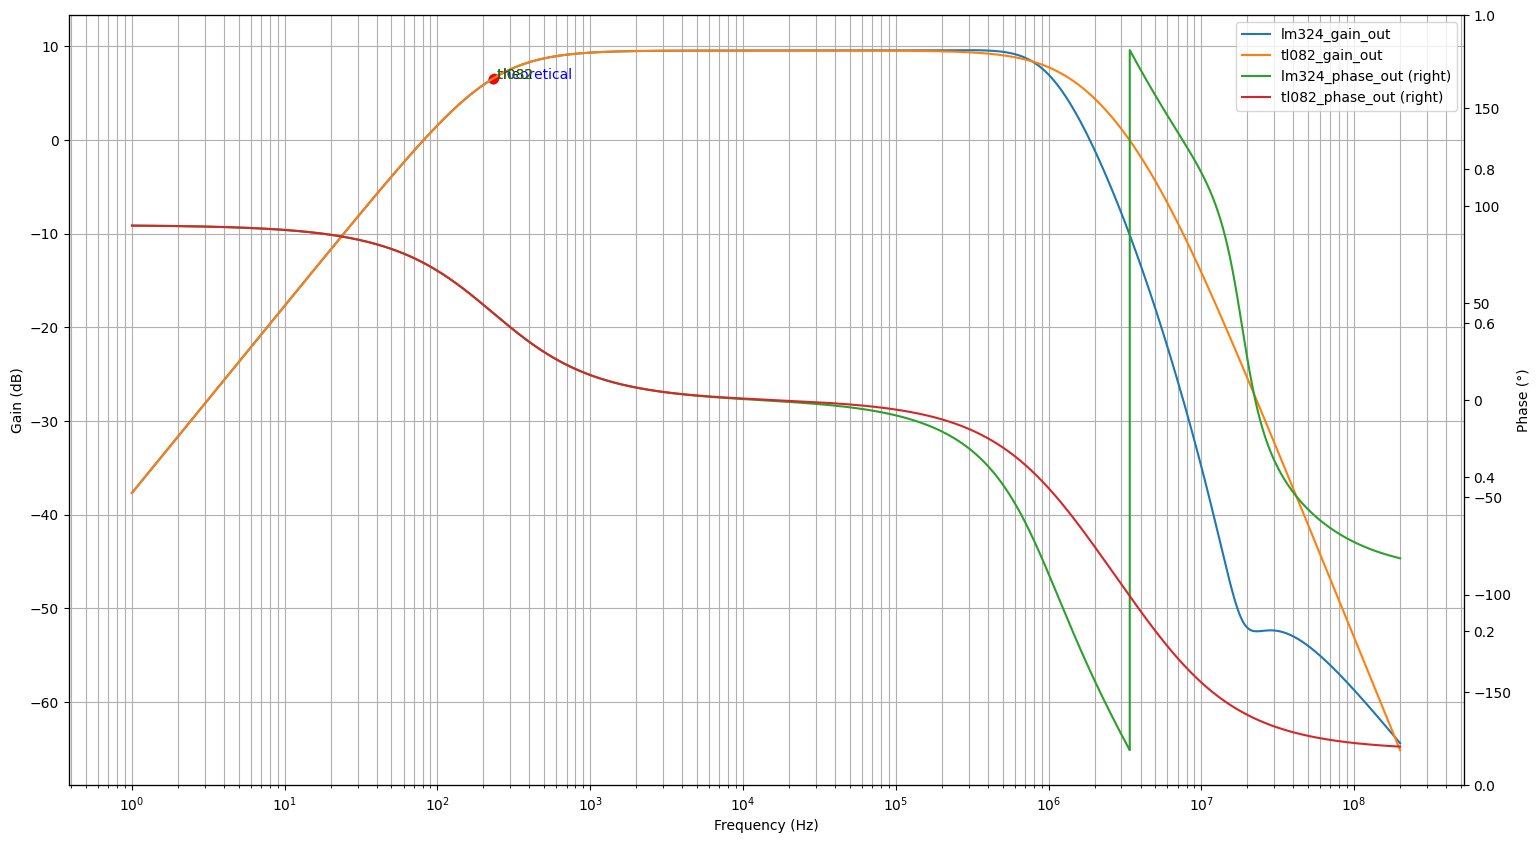

In [294]:
doc0 = pd.DataFrame(pd.read_csv("./analises/1/1.txt", index_col="frequency"))

gain_theoretical = linear_2_log(3)
gain_tl082 = get_gain(doc0, "tl082_gain_out")
gain_lm324 = get_gain(doc0, "lm324_gain_out")

cutoff_frequency_theoretical = 230
cutoff_frequency_tl082 = get_cutoff_frequency(doc0, "tl082_gain_out")
cutoff_frequency_lm324 = get_cutoff_frequency(doc0, "lm324_gain_out")

print_param("Gain theoretical", linear_2_log(3), "db")
print_param("Gain tl082", gain_tl082, "db")
print_param("Gain lm324", gain_lm324, "db")
print_param("Cutoff frequency theoretical", 230, "Hz")
print_param("Cutoff frequency tl082", cutoff_frequency_tl082, "Hz")
print_param("Cutoff frequency lm324", cutoff_frequency_lm324, "Hz")


fig, ax = plt.subplots(figsize=(18, 10))

# plot cutoff frequencies
# theoretical
ax.scatter(x=cutoff_frequency_theoretical, y=gain_theoretical - 3,
           label="cutoff frequency tl082", color='b')
ax.annotate(' theoretical', (cutoff_frequency_theoretical,
            gain_theoretical-3), color='b')
# TL082
ax.scatter(x=cutoff_frequency_tl082, y=gain_tl082 - 3,
           label="cutoff frequency tl082", color='r')
ax.annotate(' tl082', (cutoff_frequency_theoretical,
            gain_tl082 - 3), color='r')
# LM324
ax.scatter(x=cutoff_frequency_lm324, y=gain_lm324 - 3,
           label="cutoff frequency tl082", color='r')
ax.annotate(' tl082', (cutoff_frequency_theoretical,
            gain_lm324 - 3), color='g')

# plot gain
doc0.plot(
    ax=ax,
    y=["lm324_gain_out", "tl082_gain_out"],
    secondary_y=["lm324_phase_out", "tl082_phase_out"],
    figsize=(18, 10),
    ylabel="Gain (dB)"
)

ax2 = ax.twinx()

# plot phase
doc0.plot(
    ax=ax,
    y=["lm324_phase_out", "tl082_phase_out"],
    secondary_y=True,
    ylabel="Phase (°)"
)


ax.grid(visible=True, which='both', axis='both')

# configure X axis
ax.set_xscale('log', base=10)
ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.xaxis.set_minor_locator(LogLocator(
    base=10.0, subs=np.arange(0.1, 1.0, 0.1), numticks=150))
ax.set_xlabel("Frequency (Hz)")
